# Artificial Neural Networks and Convolutional Neural Networks (CNN)

**Autoria:**  
Projeto desenvolvido em dupla por Julia Andreatta e Larissa Zózimo Antunes.

**Contexto:**  
Estudo acadêmico desenvolvido como parte da formação em Ciência da Computação.

## Descrição do projeto

Este notebook apresenta uma análise de uma Rede Neural Artificial (RNA) e uma Rede Neural Convolucional (RNC) com base em uma implementação fornecida.

O objetivo deste projeto é compreender como as redes neurais são estruturadas e configuradas, identificar o papel de cada camada e operação e analisar o impacto das escolhas arquitetónicas, hiperparâmetros e estratégias de treino no desempenho do modelo.

Em vez de implementar os modelos a partir do zero, este trabalho concentra-se na interpretação do código, explicação e avaliação crítica dos resultados.


## **Redes Neurais e CNN: Identificação de Objetos**

Neste trabalho iremos fazer a identificação de um conjunto de dados de imagens de artigos de Zalando chamado Fashion-MNIST, que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes.

Fonte: https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br

## **ATIVIDADE:**

**Descrição:**

Nesta atividade, você receberá um código de uma Rede Neural Artificial e uma Rede Neural Convolucional (CNN) implementada. Sua tarefa é analisar o código fornecido e fazer uma interpretação detalhada de cada linha, identificando e explicando as principais etapas, camadas e operações realizadas pela RNA e pela CNN.

**Instruções:**

1. Preencha o código com comentários em cada linha, explicando sua função e propósito.
2. Analise o código cuidadosamente para entender como a CNN é configurada.
3. Identifique e explique as camadas de convolução, camadas de pooling, camadas densas, funções de ativação, tamanhos dos filtros, número de neurônios, etc.
4. Identifique quais técnicas de regularização ou otimização formam utilizadas no código e explique como elas contribuem para o desempenho e a generalização do modelo.
5. Comente sobre a função de ativação utilizada na camada de saída.
6. Descreva os hiperparâmetros e ajustes do modelo, como a taxa de aprendizado, número de épocas de treinamento e o tratamento dos conjuntos de dados de treinamento e teste.
7. Faça uma avaliação descritiva dos resultados das Redes Neurais implementadas.



**Entregável:**

Prepare uma análise detalhada do código fornecido, destacando as principais características da CNN e como ela é configurada para a tarefa em questão. Se necessário, inclua observações sobre o potencial de melhoria ou otimização do modelo.

Esta atividade visa consolidar seu conhecimento sobre CNNs, ajudando a compreender como uma Rede Neural Convolucional é implementada e configurada para tarefas específicas.

In [ ]:
#importações necessárias
import tensorflow as tf
from tensorflow import keras

In [ ]:
#importações necessárias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline #inclui os gráficos produzidos pelo Matplotlib diretamente no notebook, juntamente com o código

## Importando base de dados

In [ ]:
#carrega o dataset da biblioteca keras
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
#conjunto dicidido em treino e teste
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#imprime as dimensões dos dados
print(X_train_full.shape) #total de imagens treino, 28x28 pixels
print(y_train_full.shape) #rótulos
print(X_test.shape) #total de imagens teste, 28x28 pixels
print(y_test.shape) #rótulos

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Transformar a escala para que os valores fiquem entre 0 e 1 - normalização
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
#classes do dataset
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta",
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [ ]:
#acessando o rótulo da sexta imagem do conjunto de treino
nomes_classes[y_train[5]]

'bota'

In [ ]:
#acessando a sexta imagem do conjunto de treino
X_train[5]
#imprime uma matriz com os valores de cinza dos pixels - 0 = preto, 1 = branco

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

bota


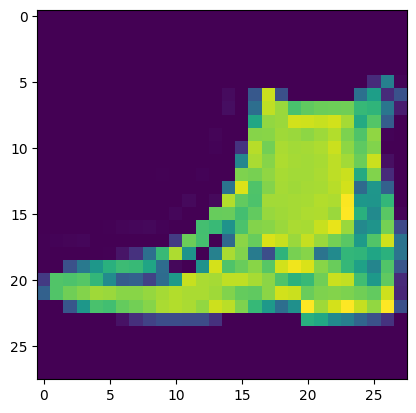

In [ ]:
exemplo_n = 5 #a variável acessa a imagem de índice 5 do conjunto de treino - sexta imagem
print(nomes_classes[y_train[exemplo_n]]) #imprime a classe
plt.imshow(X_train[exemplo_n], interpolation='nearest') #exibe a matriz da imagem (visto acima) como uma imagem
plt.show()

##  Rede Neural Artificial com Keras

In [ ]:
nn = keras.models.Sequential() #modelo sequencial - as camadas serão empilhadas
nn.add(keras.layers.Flatten(input_shape=[28, 28])) #achatamento - redução da matriz da imagem para um vetor
nn.add(keras.layers.Dense(300, activation="relu")) #primeira camada densa - 300 neurônios, função de ativação relu
nn.add(keras.layers.Dropout(rate=0.1)) #10% dos neurônios são desligados aleatoriamente - evitar overfitting
nn.add(keras.layers.Dense(100, activation="relu")) #segunda camada densa - 100 neurôniso
nn.add(keras.layers.Dropout(rate=0.1))
nn.add(keras.layers.Dense(10, activation="softmax")) #camada de saída - 10 neurônios, função de ativação softmax
nn.summary()

#ou seja, duas camadas ocultas(relu), regularização e saída softmax para classificação multiclasse

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando e treinando o modelo

In [ ]:
%time
#define função de perda, otimizador e métrica de avaliação
nn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history_nn = nn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid)) #o modelo será treinado por 5 épocas

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6580 - loss: 1.0444 - val_accuracy: 0.8228 - val_loss: 0.5308
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8100 - loss: 0.5539 - val_accuracy: 0.8422 - val_loss: 0.4579
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8305 - loss: 0.4875 - val_accuracy: 0.8536 - val_loss: 0.4227
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8410 - loss: 0.4503 - val_accuracy: 0.8622 - val_loss: 0.4009
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8518 - loss: 0.4204 - val_accuracy: 0.8676 - val_loss: 0.3866


### Visualizar a performance

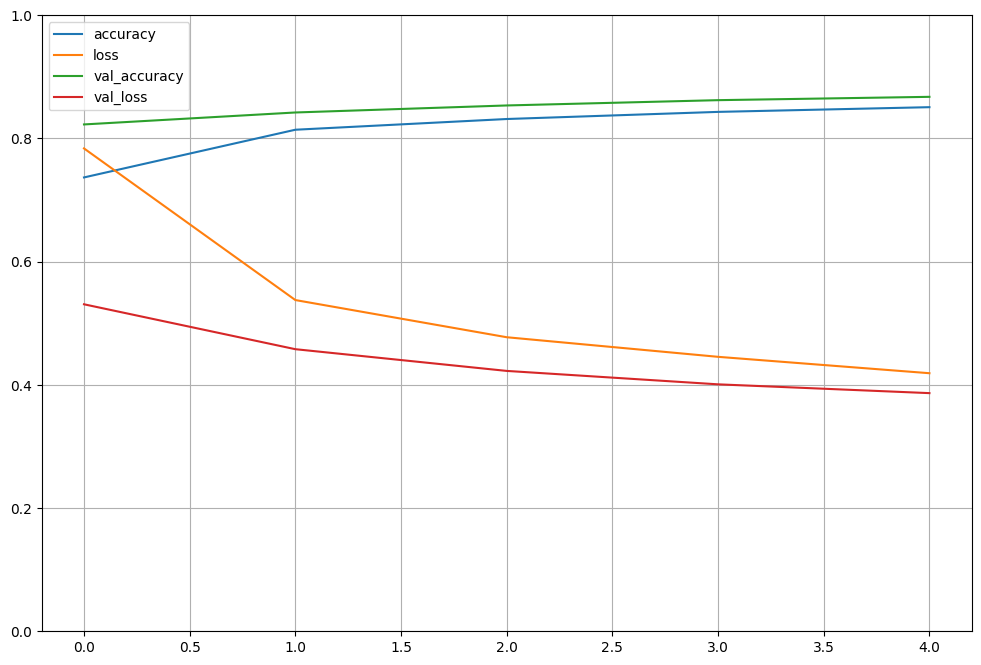

In [ ]:
#visualizando a evolução da acurácia e perda ao longo das épocas
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Avaliar o modelo

In [ ]:
# prints the loss and the accuracy
nn.evaluate(X_test, y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8222 - loss: 62.0432


[67.20960235595703, 0.8130000233650208]

###Realizar uma Previsão

In [ ]:
X_novo = X_test[:4] #4 primeiras imagens do conjunto de teste
y_proba = nn.predict(X_novo) #cria a matriz de probabilidade
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(nn.predict(X_novo), axis=-1) #retorna o índice de maior probabilidade
print(y_pred)
print(np.array(nomes_classes)[y_pred]) #retorna a classe correspondente

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


### Verificar os resultados

In [ ]:
y_novo = y_test[:4] #rótulos reais das 4 primeiras imagens
print(y_novo)
np.array(nomes_classes)[y_pred] #classes correspondentes

[9 2 1 1]


array(['bota', 'casaco', 'calca', 'calca'], dtype='<U10')

calca


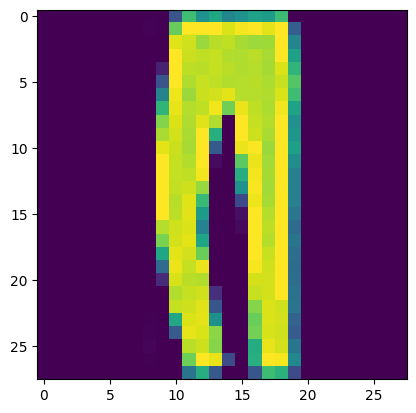

In [ ]:
# example_n = 201
#imprime o nome e plota a imagem de índice 2
print(nomes_classes[y_pred[2]])
plt.imshow(X_novo[2], interpolation='nearest')
plt.show()

## Treinando CNN com Keras

In [ ]:
#modelo sequencial - as camadas serão empilhadas
cnn = keras.models.Sequential([
keras.layers.InputLayer(input_shape = (28,28,1)), #add canal (1) para tons de cinza
keras.layers.Conv2D(64,5, activation='relu', padding='same', kernel_initializer='glorot_uniform'), #64 filtros de 5x5, padding para assegurar que tam. saída = tam. original entrada
keras.layers.MaxPool2D(2), #pooling 1 - reduz a imagem por 2 (metade)
keras.layers.Conv2D(128,3, activation='relu', padding='same'), #camada 2 - 128 filtros de 3x3
keras.layers.Conv2D(128,3, activation='relu', padding='same'), #camada 3
keras.layers.MaxPool2D(2), #pooling 2
keras.layers.Conv2D(258,3, activation='relu', padding='same'), #camada 4 - 258 filtros de 3x3
keras.layers.Conv2D(258,3, activation='relu', padding='same'), #camada 5
keras.layers.MaxPool2D(2), #pooling 3
keras.layers.Flatten(), #achatamento - redução da matriz da imagem para um vetor
keras.layers.Dense(128, activation="relu"), #128 neurônios, função de ativação relu
keras.layers.Dropout(rate=0.5), #50% dos neurônios são desligados aleatoriamente - evitar overfitting
keras.layers.Dense(64, activation="relu"), #64 neurônios, função de ativação relu
keras.layers.Dropout(rate=0.5), #50% dos neurônios são desligados aleatoriamente - evitar overfitting
keras.layers.Dense(10, activation="softmax")]) #camada de saída - 10 neurônios (para 10 classes), função de ativação softmax


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 258)      │       297,474 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 258)      │       599,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 258)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2322)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       297,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,162 (5.44 MB)

 Trainable params: 1,426,162 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train.shape)
#faz o redimensionamento dos dados
#adiciona canal(1) para tons de cinza
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_valid_new = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2],1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
#imprime o novo formato
print(X_train_new.shape)

(55000, 28, 28)
(55000, 28, 28, 1)


In [ ]:
#perda, otimizador e métrica de avaliação
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#treino com 20 épocas
history_cnn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_valid_new, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 760s 442ms/step - accuracy: 0.3248 - loss: 1.8241 - val_accuracy: 0.7522 - val_loss: 0.6983
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 781s 430ms/step - accuracy: 0.6834 - loss: 0.8550 - val_accuracy: 0.8034 - val_loss: 0.5270
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 746s 432ms/step - accuracy: 0.7496 - loss: 0.6844 - val_accuracy: 0.8244 - val_loss: 0.4640
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 805s 434ms/step - accuracy: 0.7842 - loss: 0.5921 - val_accuracy: 0.8514 - val_loss: 0.4204
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 797s 431ms/step - accuracy: 0.8074 - loss: 0.5420 - val_accuracy: 0.8580 - val_loss: 0.3904
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 743s 431ms/step - accuracy: 0.8240 - loss: 0.5118 - val_accuracy: 0.8618 - val_loss: 0.3801
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 735s 427ms/step - accuracy: 0.8309 - loss: 0.4816 - val_accuracy: 0.8734 - val_loss: 0.3580
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 746s 430ms/step - ac

### Avaliar o modelo

In [ ]:
cnn.evaluate(X_test_new, y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.8846 - loss: 28.0510


[28.27934455871582, 0.8812999725341797]

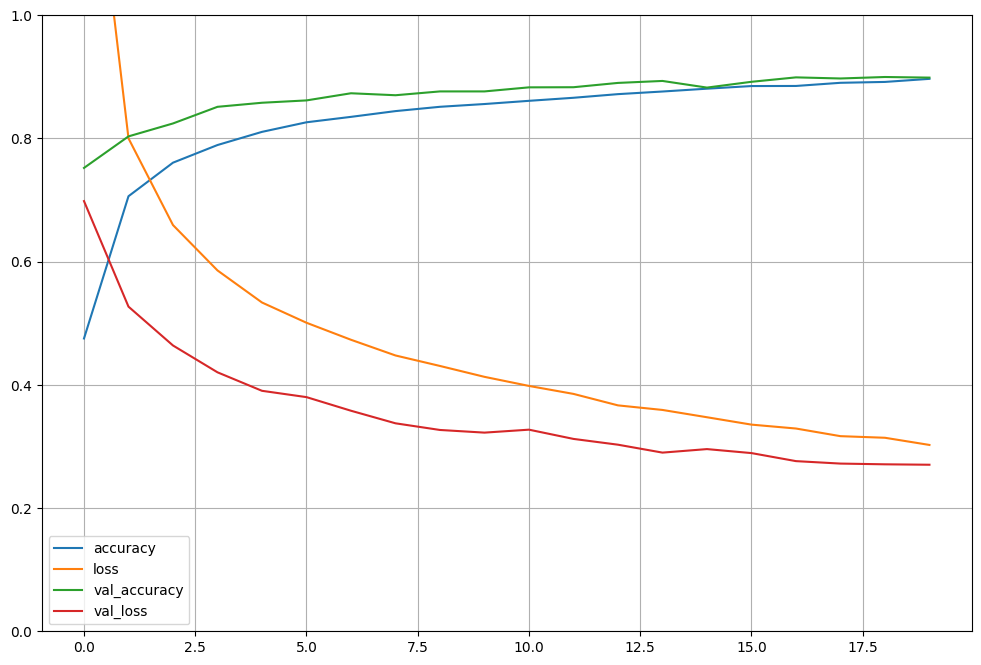

In [ ]:
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## **RNA tradicional**
A RNA tradicional começa achatando a matriz da imagem em um vetor. Esse vetor passa por duas camadas densas, a primeira com 300 neurônios e a segunda com 100 neurônios, ambas com função de ativação relu, que acelera o treinamento e evita problemas com medidas muito pequenas. A camada de saída contém 10 neurônios com ativação softmax, usada para gerar probabilidades em classificação multiclasse. Para regularização, foi usado dropout com taxa de 0.1, que desativam aleatoriamente 10% dos neurônios durante o treino, ajudando a prevenir overfitting. A função de perda é sparse_categorical_crossentropy, e o otimizador é o sgd, que realiza atualizações simples e estáveis nos pesos. O modelo foi treinado por 5 épocas, com os dados normalizados.


## **CNN**
O modelo utiliza camadas de convolução (Conv2D) com filtros de tamanhos 5x5 e 3x3, em quantidades crescentes (64, 128 e 256), para extrair padrões visuais como bordas e texturas das imagens de entrada. As camadas de pooling reduzem pela metade as dimensões, mantendo as informações mais relevantes e diminuindo o custo computacional. Após as extrações, acontece o achatamento da matriz da imagem em um vetor, que é processado por camadas densas com 128 e 64 neurônios, ativadas por relu. A saída possui 10 neurônios com ativação softmax, que transforma os resultados em probabilidades para classificação multiclasse. A regularização é feita com dropout com taxa de 0.5, que desativa aleatoriamente neurônios durante o treino, reduzindo o overfitting. O otimizador é também o sgd e é usado para atualizar os pesos de forma gradual e estável. A função de perda também é sparse_categorical_crossentropy, adequada para rótulos inteiros em tarefas multiclasse. O modelo foi treinado por 20 épocas, com os dados normalizados.

## **Breve análise complementar**
Na RNA tradicional, as imagens são achatadas, transformando a matriz da imagem em um vetor, para melhorar o processamento. No entanto, esse processo pode ocasionar a perda de informações. Ademais, quanto mais parâmetros, mais lento. Esses são alguns dos motivos do porquê as CNNs são preferíveis. Em conclusão, a RNA tradicional teve um bom desempenho, aumentando sua acurácia ao longo das épocas e diminuindo a perda, foi mais rápida e acertou as previsões feitas.

Já a CNN aplica filtros que aprendem a detectar padrões mais complexos, e os procedimentos implementados como o pooling melhoram a eficiência do treinamento. Também passa por uma parte de achatamento das imagens, regularização, entre outros (todos comentados/explicados no código). Nesse caso, a acurácia atingiu valores maiores que a RNA tradicional e a perda atingiu valores menores (ou seja, a RNA foi menos precisa). CNN teve uma boa eficácia, no entanto, foi muito mais lenta.

Algumas melhorias que poderiam ser testadas e adotadas é a substituição do otimizador por outro modelo, o ajuste das taxas de regularização, entre outros. No que diz respeito ao tempo e custo computacional uma solução seria simplificar o modelo (CNN), reduzindo quantidade de camadas e filtros, por exemplo.
